In [4]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data.faces.faces_data import get_faces_dataset
import common_grid_search_analysis
import TrainingCurves

import numpy as np
import pandas  as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit


PLOT_PREFIX = "Figures/FACES_DT_TEST_"
GLOBAL_FIG_COUNTER = 0

GS_FILE_NAME_PREFIX = "Analysis_Data/FACES_DECISION_TREE"

In [5]:
# Load Data
import DecisionTrees.common_decision_tree as common_decision_tree
X_train, X_test, y_train, y_test = get_faces_dataset()
num_features = X_train.shape[1]


In [6]:
# Start with Learning Curve on Default Classifier
train_sizes, train_scores, test_scores, fit_times = TrainingCurves.perform_learning_curve(tree.DecisionTreeClassifier(criterion='gini'), X_train, y_train, "accuracy")


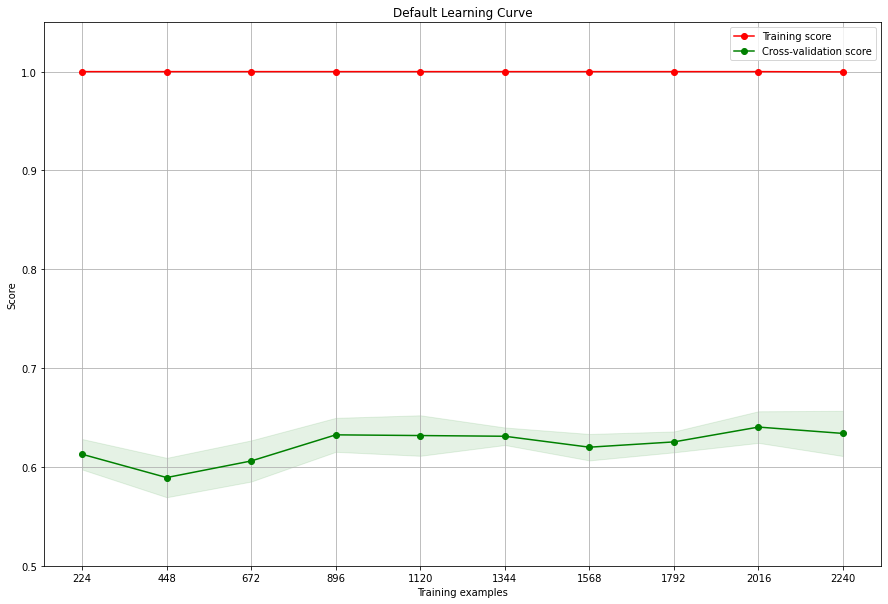

In [7]:
ylim=(0.5, 1.05)
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, "Default Learning Curve", ylim=ylim)


In [8]:
ccp_alpha = np.arange(0.0, 0.01, 0.0002)

criterion = ['gini', 'entropy']
min_samples_split = [i for i in range(2, 200, 5)]
min_samples_leaf = [i for i in range(1, 200, 5)]
max_depth = [i for i in range(1, 100, 2)]
 = [i for i in range(num_features)]



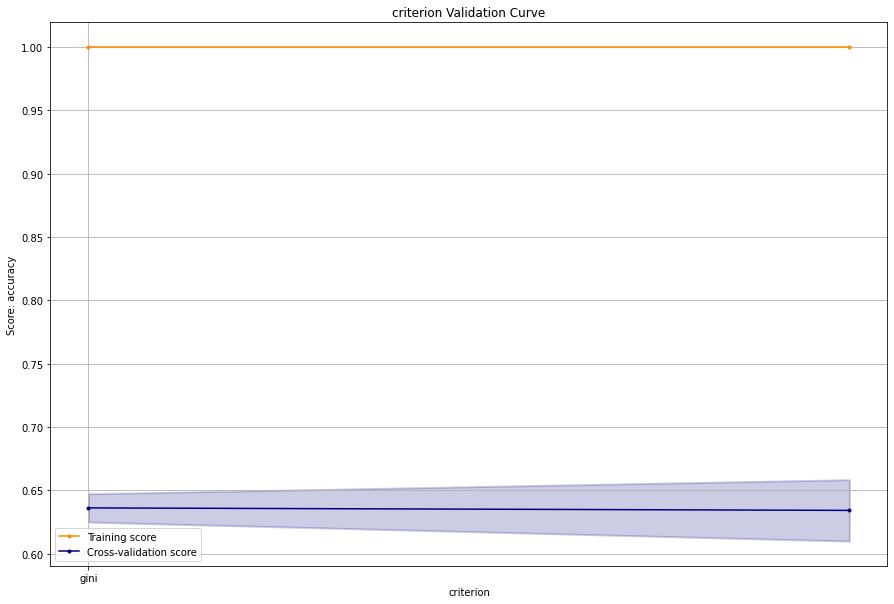

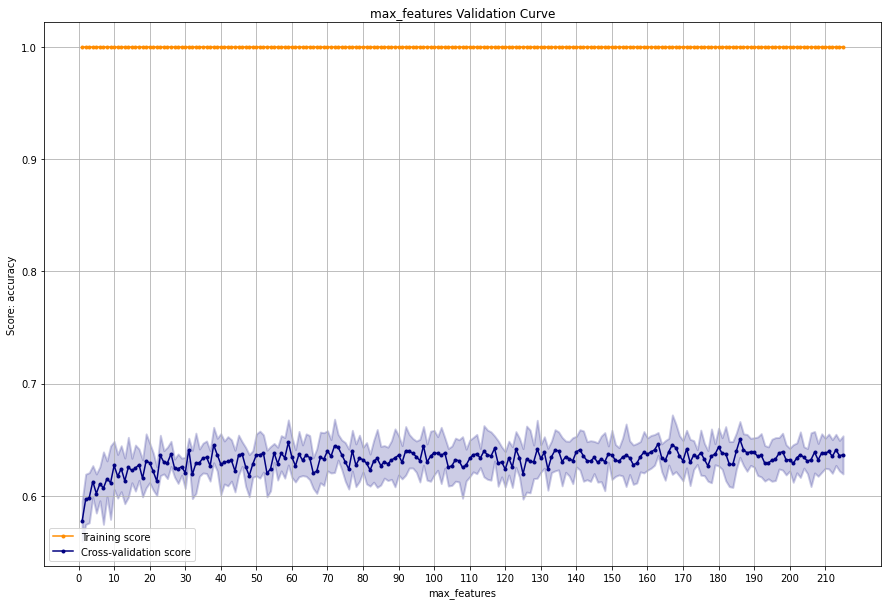

In [13]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(), X_train, y_train, "criterion", criterion, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "criterion", criterion, title="criterion Validation Curve", scoring="accuracy", tick_spacing=2)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(), X_train, y_train, "max_features", max_features, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "max_features", max_features, title="max_features Validation Curve", scoring="accuracy", tick_spacing=10)


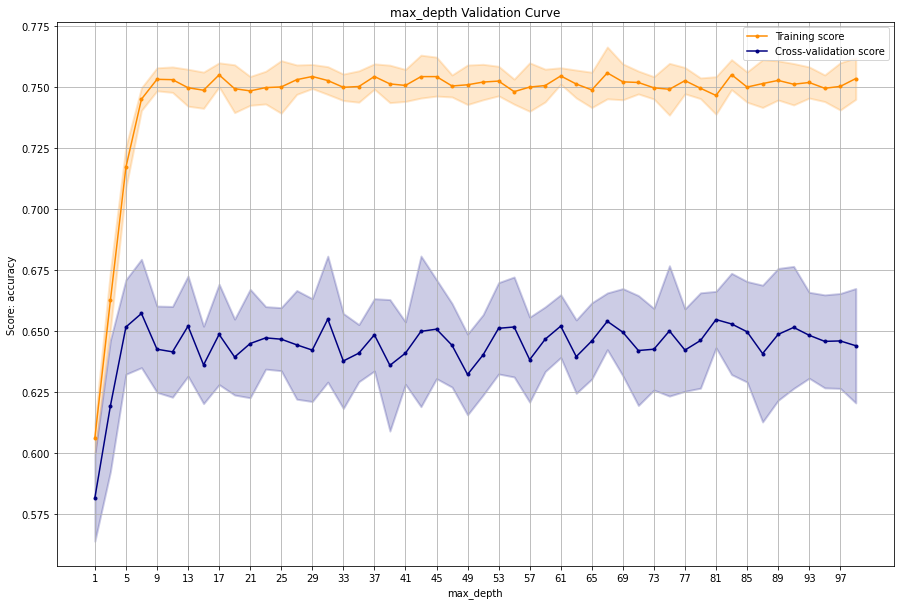

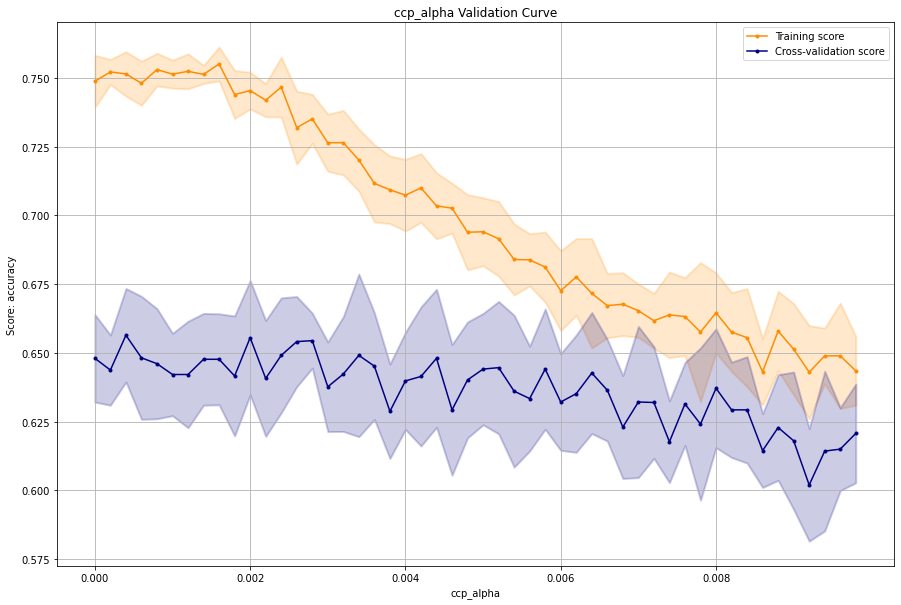

In [11]:
test_parameters = {"min_samples_leaf": 37, "min_samples_split": 30, "max_features": 50}

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(**test_parameters), X_train, y_train, "max_depth", max_depth, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "max_depth", max_depth, title="max_depth Validation Curve", scoring="accuracy", tick_spacing=2)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(**test_parameters), X_train, y_train, "ccp_alpha", ccp_alpha, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "ccp_alpha", ccp_alpha, title="ccp_alpha Validation Curve", scoring="accuracy", tick_spacing=10)


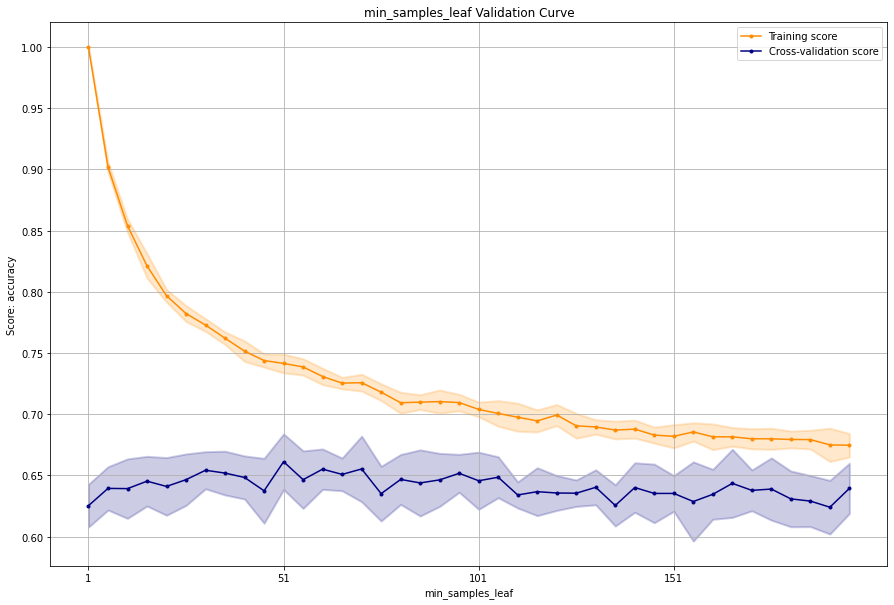

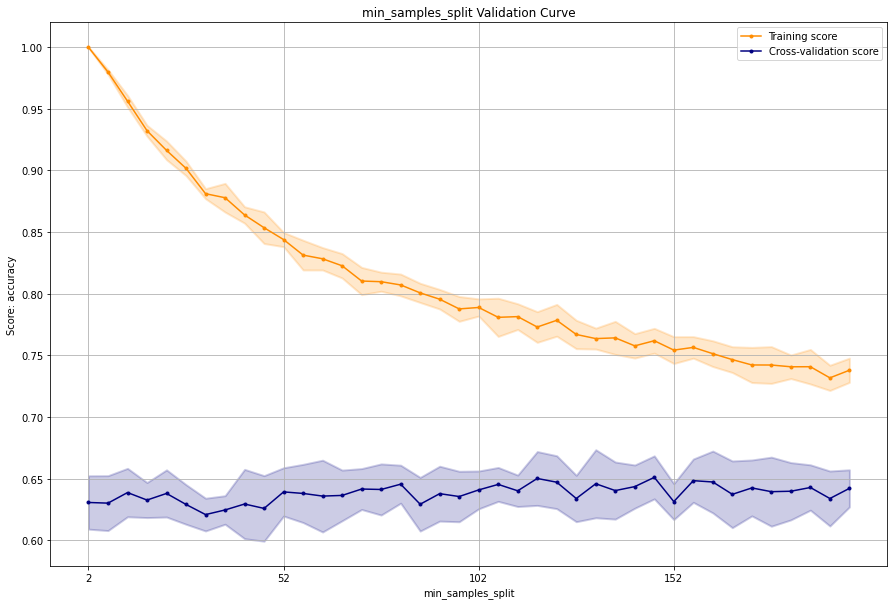

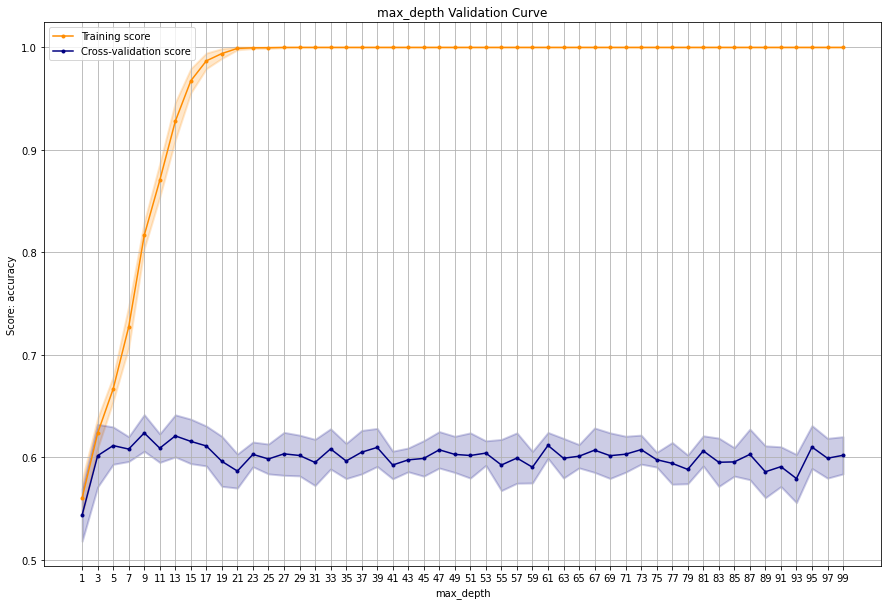

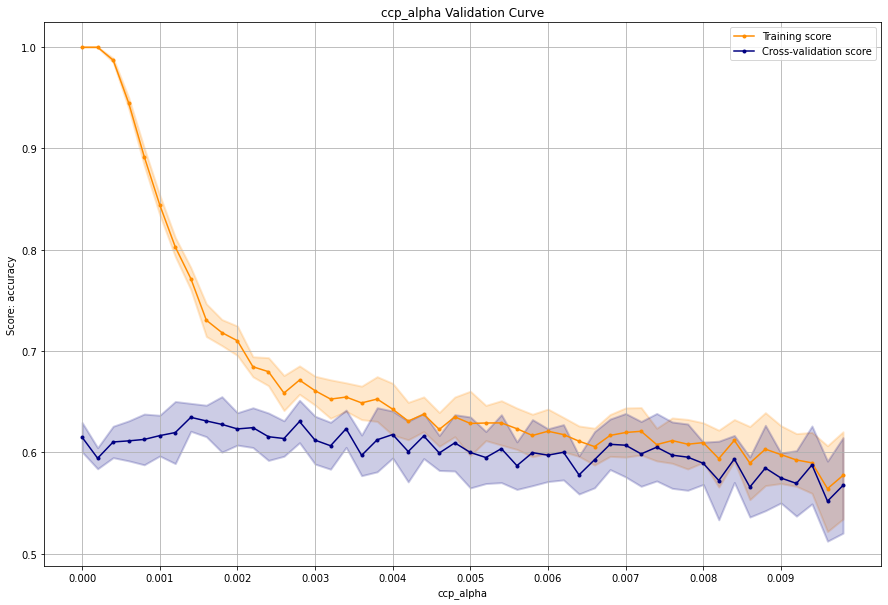

In [12]:
test_parameters = {'criterion': 'gini', 'max_features': num_features//2, 'max_depth': 100, 'ccp_alpha': 0.0001}
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(**test_parameters), X_train, y_train, "min_samples_leaf", min_samples_leaf, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "min_samples_leaf", min_samples_leaf, title="min_samples_leaf Validation Curve", scoring="accuracy", tick_spacing=10)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(**test_parameters), X_train, y_train, "min_samples_split", min_samples_split, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "min_samples_split", min_samples_split, title="min_samples_split Validation Curve", scoring="accuracy", tick_spacing=10)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(max_features=3), X_train, y_train, "max_depth", max_depth, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "max_depth", max_depth, title="max_depth Validation Curve", scoring="accuracy", tick_spacing=1)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(max_features=3), X_train, y_train, "ccp_alpha", ccp_alpha, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "ccp_alpha", ccp_alpha, title="ccp_alpha Validation Curve", scoring="accuracy", tick_spacing=5)


In [16]:
ccp_alpha = np.arange(0.0, 0.01, 0.0002)

criterion = ['gini', 'entropy']
min_samples_split = [i for i in range(2, 200, 5)]
min_samples_leaf = [i for i in range(1, 200, 5)]
max_depth = [i for i in range(1, 25, 2)]
max_features = [i for i in range(num_features)]

parameters = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split, 'ccp_alpha': ccp_alpha, 'max_features': max_features}

parameters = {'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'ccp_alpha': ccp_alpha, "max_depth": max_depth}

default_parameters = {'criterion': 'gini', 'max_features': num_features//2}
gs = common_decision_tree.perform_grid_search(parameters, X_train, y_train, scoring='accuracy', GS_FILE_NAME_PREFIX= GS_FILE_NAME_PREFIX, default_parameters=default_parameters)

gs_results = gs

Grid Search Will be Saved to  Analysis_Data/FACES_DECISION_TREE_min_samples_split_2-197_min_samples_leaf_1-196_ccp_alpha_0.0-0.0098_max_depth_1-23.pickle
Fitting 5 folds for each of 960000 candidates, totalling 4800000 fits
Saved  Analysis_Data/FACES_DECISION_TREE_min_samples_split_2-197_min_samples_leaf_1-196_ccp_alpha_0.0-0.0098_max_depth_1-23.pickle


Plot saved as:  Figures/FACES_DT_TEST_GS_ModelComplexity_ccp_alpha_max_depth_min_samples_leaf_min_samples_split.png


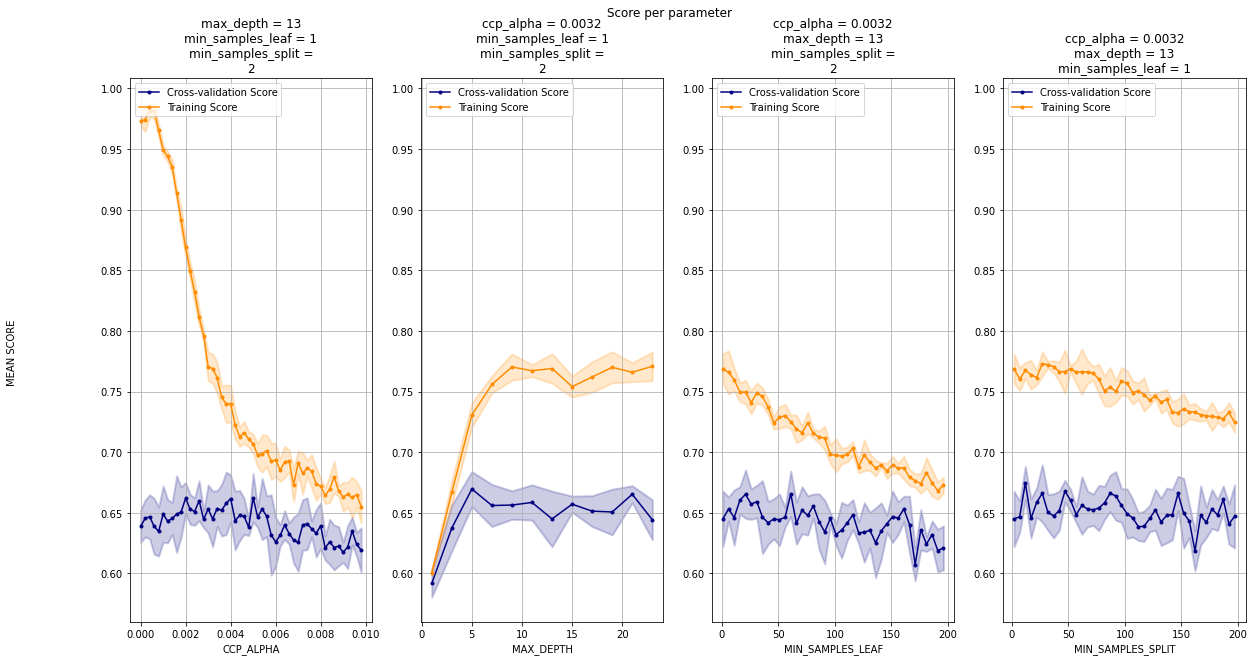

In [17]:
unused_params_values = {'min_samples_leaf': min(min_samples_leaf), 'min_samples_split': min(min_samples_split), 'max_features': max(max_features)}

common_grid_search_analysis.plot_grid_search_model_complexity(gs_results, PLOT_PREFIX, unused_params_value_dict=unused_params_values)

Plot saved as:  Figures/FACES_DT_TEST_GS_Times_ccp_alpha_max_depth_min_samples_leaf_min_samples_split.png


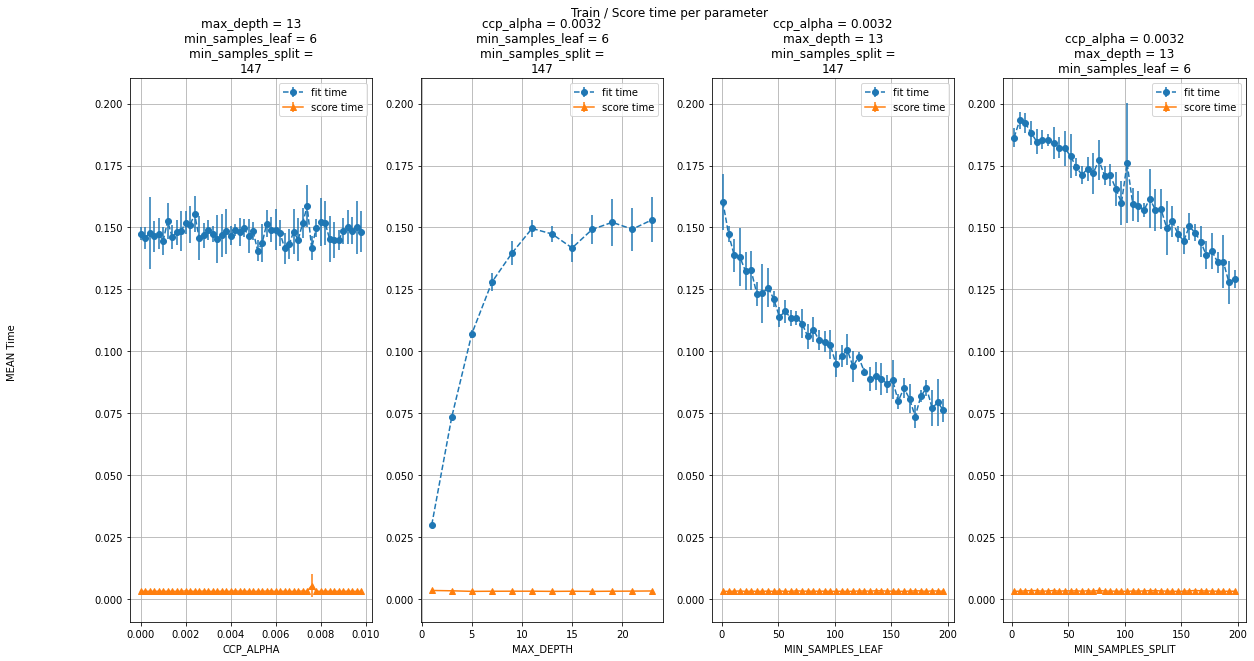

In [18]:
common_grid_search_analysis.plot_grid_search_training_times(gs_results, PLOT_PREFIX)

Plot saved as:  Figures/FACES_DT_TEST_GridScore_min_samples_split_min_samples_leaf_0.png


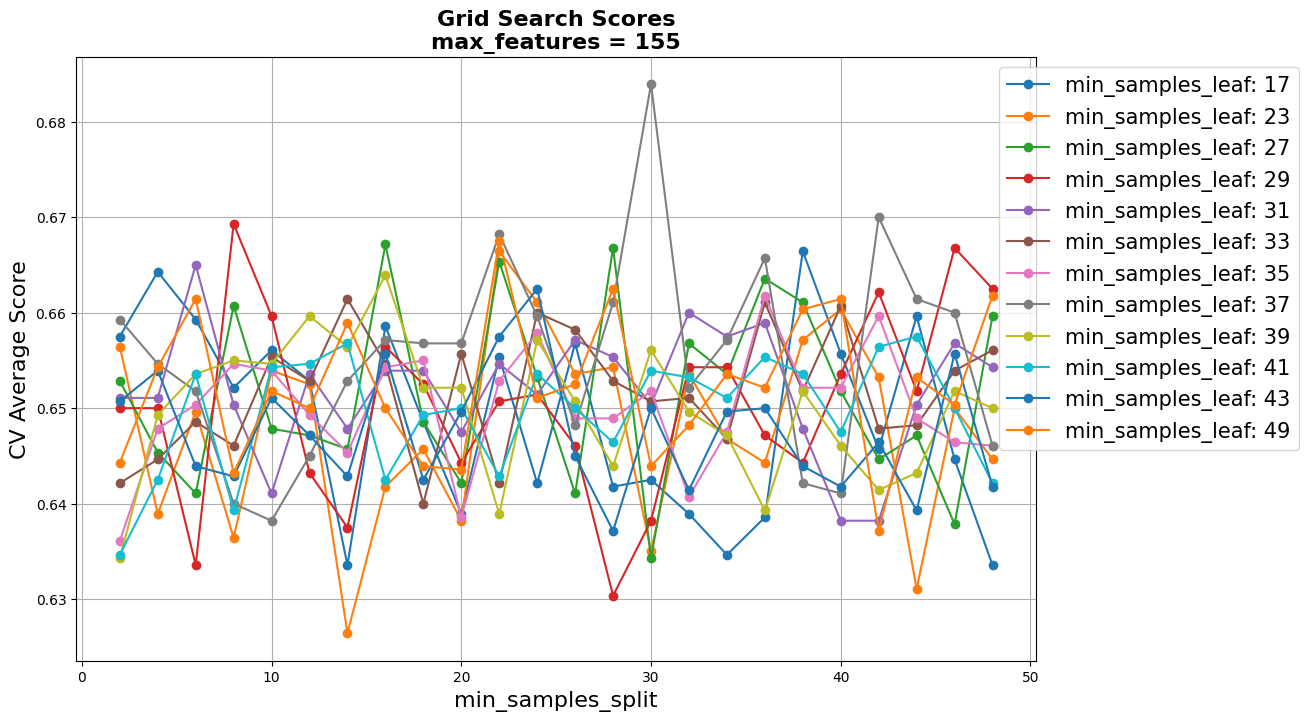

In [16]:
mean_score_limit=0.65
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'min_samples_split', 'min_samples_leaf', mean_score_limit, PLOT_PREFIX=PLOT_PREFIX, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1